# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [13]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [15]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [16]:
# Create a Beautiful Soup Object
from bs4 import BeautifulSoup
html_content = browser.html
soup = BeautifulSoup(html_content, 'html.parser')

In [17]:
# Extract all rows of data
table = soup.find('table', class_='table')  # Replace 'table' with the actual class name if different

# Extract all rows of the table
rows = table.find_all('tr') if table else []

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Hereâ€™s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [23]:
# Create an empty list
import pandas as pd
data_rows = []
# Loop through the scraped data to create a list of rows
scraped_data = []
for row in rows:
    # Extract the text from each cell within the row and create a list
    cells = row.find_all('td')
    cell_data = [cell.get_text(strip=True) for cell in cells]
    scraped_data.append(cell_data)

# Now you can loop through scraped_data to create your dictionaries
data_rows = []

# Assuming scraped_data is a list of lists, where each inner list represents a row of table data
for row in scraped_data:
    # Check that the row has the expected number of elements
    if len(row) == 7:  # Adjust this number based on the expected number of columns
        row_dict = {
            'id': int(row[0]),
            'terrestrial_date': row[1],
            'sol': int(row[2]),
            'ls': int(row[3]),
            'month': int(row[4]),
            'min_temp': float(row[5]),
            'pressure': float(row[6])
        }
        data_rows.append(row_dict)
    else:
        print(f"Skipped row with unexpected number of elements: {row}")

Skipped row with unexpected number of elements: []


In [24]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df = pd.DataFrame(data_rows, columns=column_names)


In [25]:
# Confirm DataFrame was created successfully
print(mars_df.head())

   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [27]:
# Examine data type of each column
print(mars_df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [28]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df = mars_df.astype({
    'id': 'int64',
    'sol': 'int64',
    'ls': 'int64',
    'month': 'int64',
    'min_temp': 'float64',
    'pressure': 'float64'
})

In [29]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [31]:
# 1. How many months are there on Mars?
num_months_on_mars = mars_df['month'].nunique()
print(f"There are {num_months_on_mars} Martian months represented in the dataset.")

There are 12 Martian months represented in the dataset.


In [32]:
# 2. How many Martian days' worth of data are there?
num_martian_days = mars_df['sol'].nunique()
print(f"There are {num_martian_days} Martian days' worth of data.")

There are 1867 Martian days' worth of data.


In [33]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
print("Average low temperature by Martian month:")
print(average_low_temp_by_month)

Average low temperature by Martian month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


<Axes: title={'center': 'Average Low Temperature by Martian Month'}, xlabel='month'>

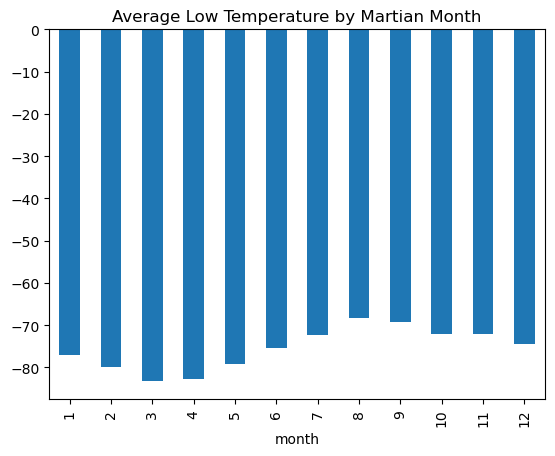

In [34]:
# Plot the average temperature by month
average_low_temp_by_month.plot(kind='bar', title='Average Low Temperature by Martian Month')

In [35]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = average_low_temp_by_month.idxmin()
hottest_month = average_low_temp_by_month.idxmax()
print(f"The coldest Martian month in the dataset is: {coldest_month}")
print(f"The hottest Martian month in the dataset is: {hottest_month}")

The coldest Martian month in the dataset is: 3
The hottest Martian month in the dataset is: 8


In [37]:
# 4. Average pressure by Martian month
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
print("Average pressure by Martian month:")
print(average_pressure_by_month)

Average pressure by Martian month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


<Axes: title={'center': 'Average Pressure by Martian Month'}, xlabel='month'>

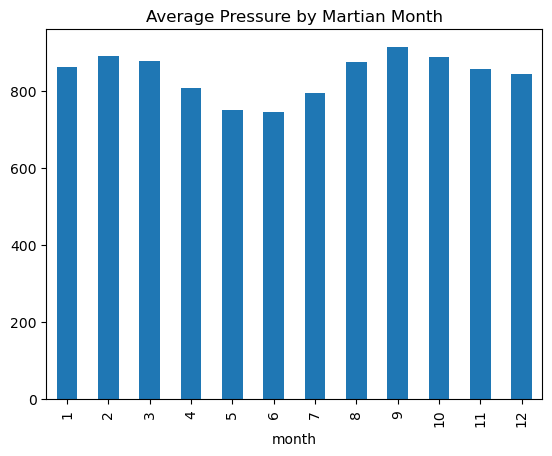

In [38]:
# Plot the average pressure by month
average_pressure_by_month.plot(kind='bar', title='Average Pressure by Martian Month')


Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')


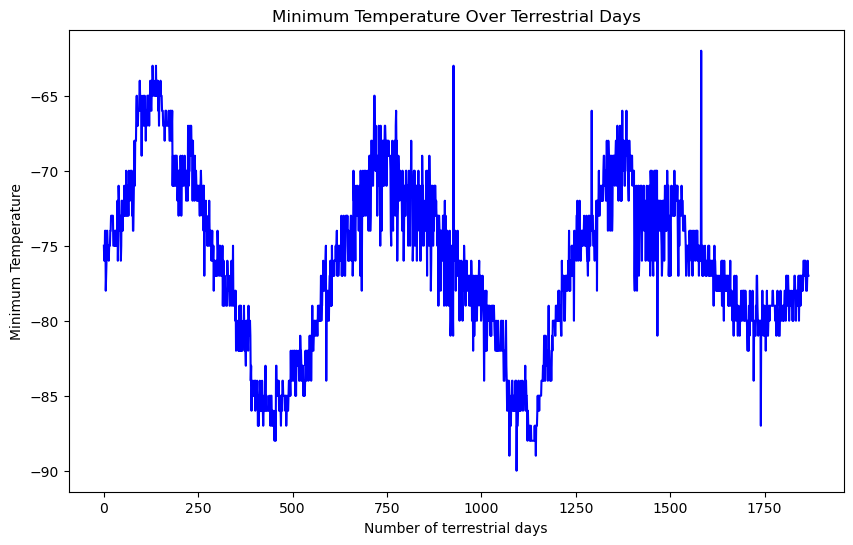

In [44]:
# 5. How many terrestrial (earth) days are there in a Martian year?
import matplotlib.pyplot as plt

# Check your DataFrame to see what columns are available
print(mars_df.columns)

# If 'terrestrial_days' is not a column, you might want to use the DataFrame index as the x-axis
plt.figure(figsize=(10, 6))
plt.plot(mars_df.index, mars_df['min_temp'], color='blue')  # Replace 'min_temp' with the actual column name if different

# Add labels and title as necessary
plt.xlabel('Number of terrestrial days')  # Adjust this label to match the data represented by the index
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Over Terrestrial Days')

# Show the plot
plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [45]:
# Write the data to a CSV
mars_df.to_csv('mars_temperature_data.csv', index=False)

In [46]:
browser.quit()